In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

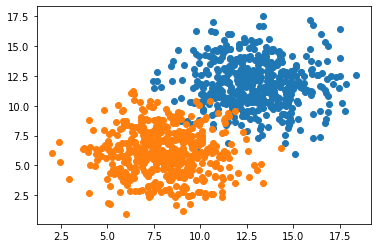

In [ ]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
Y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [ ]:
model = Sequential()
model.add(Dense(units = 1, input_shape = (2,), activation = 'sigmoid'))
adam = Adam(lr = 0.1)
model.compile(adam, loss ='binary_crossentropy', metrics = ['accuracy'])
h = model.fit(x=X, y=Y, verbose=1, batch_size=50, epochs = 500, shuffle = 'true')

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


20/20 [==============================] - 0s 2ms/step - loss: 0.6978 - accuracy: 0.6050
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.8230
Epoch 3/500
20/20 [==============================] - 0s 2ms/step - loss: 0.3568 - accuracy: 0.8900
Epoch 4/500
20/20 [==============================] - 0s 2ms/step - loss: 0.3026 - accuracy: 0.9240
Epoch 5/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2599 - accuracy: 0.9390
Epoch 6/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2268 - accuracy: 0.9530
Epoch 7/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2123 - accuracy: 0.9520
Epoch 8/500
20/20 [==============================] - 0s 2ms/step - loss: 0.1812 - accuracy: 0.9610
Epoch 9/500
20/20 [==============================] - 0s 2ms/step - loss: 0.1684 - accuracy: 0.9690
Epoch 10/500
20/20 [==============================] - 0s 2ms/step - loss: 0.1578 - accuracy: 0.9700
Epoch 11/500
20/20 [=

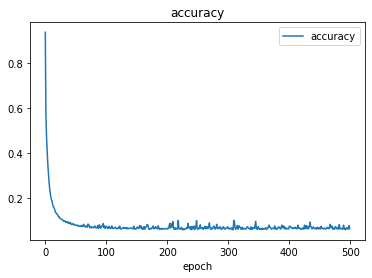

In [ ]:
plt.plot(h.history['loss'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

In [ ]:
def plot_decision_boundary(X,Y,model):
  x_span = np.linspace(min(X[:,0]) -1 ,max(X[:,0]) + 1)
  y_span = np.linspace(min(X[:,1]) -1,max(X[:,1]) + 1)
  xx, yy = np.meshgrid(x_span,y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_,yy_]
  pred_func = model.predict(grid)
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx,yy,z)

1/1 [==============================] - 0s 17ms/step
Prediction is: [[0.99999297]]


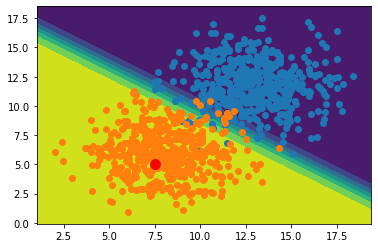

In [ ]:
plot_decision_boundary(X,Y,model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x],[y], marker = 'o', markersize = 10, color  = 'red')
print("Prediction is:", prediction)